In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
# loading R packages
library(DESeq2)
library(phyloseq)
library(plyr)
library(dplyr)
#dplyr needs to come in last
library(ggplot2)
library(doParallel)
library(rwantshue)
library(RColorBrewer)
library(vegan)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:stats’:

    xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, intersect,
    is.unsorted, lapply, Map, mapply, match, mget, order, paste, pmax,
    pmax.int, pmin, pmin.int, Position, rank, rbind, Reduce, rep.int,
    rownames, sapply, setdiff, sort, table, tapply, union, unique,
    unlist, unsplit

Loading required package: IRanges
Loading required package: GenomicRanges
Loading required package:

In [4]:
import pandas as pd

In [5]:
!head ../../SeqData/otus.pick.fasta.rrndp.tsv
# RRNDP taxa assignments on my picked OTUs, from RDP, which can then be used to map to RRNDP.

																													
56_65		Root	rootrank	1.0	Bacteria	domain	1.0	"Bacteroidetes"	phylum	1.0	Sphingobacteriia	class	1.0	"Sphingobacteriales"	order	1.0	Chitinophagaceae	family	1.0	Chitinophaga	genus	1.0
62_48		Root	rootrank	1.0	Bacteria	domain	1.0	"Actinobacteria"	phylum	1.0	Actinobacteria	class	1.0	Actinobacteridae	subclass	1.0	Actinomycetales	order	1.0	Streptomycineae	suborder	1.0	Streptomycetaceae	family	1.0	Streptomyces	genus	0.99
69.2_296		Root	rootrank	1.0	Bacteria	domain	1.0	"Proteobacteria"	phylum	1.0	Alphaproteobacteria	class	1.0	Rhizobiales	order	1.0	Phyllobacteriaceae	family	1.0	Aminobacter	genus	0.92
56_187		Root	rootrank	1.0	Bacteria	domain	1.0	"Proteobacteria"	phylum	1.0	Betaproteobacteria	class	1.0	Burkholderiales	order	1.0	Burkholderiaceae	family	1.0	Burkholderia	genus	1.0
103_43		Root	rootrank	1.0	Bacteria	domain	1.0	"Proteobacteria"	phylum	1.0	Alphaproteobacteria	class	1.0	Rhizobiales	order	1.0	Rhizobiaceae	family	0.99	Rhizobium	genus	0.99
53_7		Root	rootrank	

In [6]:
!tail ../../SeqData/cnadjusted_otus.pick.fasta_hier_rrndp.tsv
# RRNDP taxa assignments

2122	Root;rootrank;Archaea;domain;"Euryarchaeota";phylum;Thermoplasmata;class;Thermoplasmatales;order;Ferroplasmaceae;family;Acidiplasma;genus;	Acidiplasma	genus	1.000
2126	Root;rootrank;Archaea;domain;"Euryarchaeota";phylum;Thermoplasmata;class;Thermoplasmatales;order;Thermoplasmataceae;family;	Thermoplasmataceae	family	1.000
2127	Root;rootrank;Archaea;domain;"Euryarchaeota";phylum;Thermoplasmata;class;Thermoplasmatales;order;Thermoplasmataceae;family;Thermoplasma;genus;	Thermoplasma	genus	1.000
-2121	Root;rootrank;Archaea;domain;"Euryarchaeota";phylum;Thermoplasmata;class;Thermoplasmatales;order;unclassified_Thermoplasmatales;;	unclassified_Thermoplasmatales		1.000
-2135	Root;rootrank;Archaea;domain;"Thaumarchaeota";phylum;unclassified_"Thaumarchaeota";;	unclassified_"Thaumarchaeota"		3.000
2964	Root;rootrank;Archaea;domain;Woesearchaeota;phylum;	Woesearchaeota	phylum	1.770
-2965	Root;rootrank;Archaea;domain;Woesearchaeota;phylum;unclassified_Woesearchaeota;;	unclassified_Woesearchae

In [7]:
!head -50 ../../SeqData/rrnDB-4.4.3_pantaxa_stats_RDP.tsv
# RRNDP taxa assignments

id	rank	name	parentid	childcount	min	max	mode	median	mean	stddev	sum16slist
2689	genus	Thiobacillus	3442	1	2	2	2	2	2.00	0.00	[2]
2690	genus	Odoribacter	3480	1	4	4	4	4	4.00	0.00	[4]
2691	genus	Nocardioides	3539	1	2	2	2	2	2.00	0.00	[2]
2692	genus	Haloarcula	3396	3	3	3	3	3	3.00	0.00	[3, 3, 3]
2693	genus	Vulcanisaeta	3497	2	1	1	1	1.0	1.00	0.00	[1, 1]
2694	genus	Mycobacterium	3527	74	1	2	1	1.0	1.18	0.38	[1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
2695	genus	Ignavibacterium	3397	2	1	1	1	1.0	1.00	0.00	[1, 1]
2696	genus	Solibacillus	3535	1	12	12	12	12	12.00	0.00	[12]
2697	genus	Arsenophonus	3537	1	2	2	2	2	2.00	0.00	[2]
2698	genus	Chlorobaculum	3490	1	2	2	2	2	2.00	0.00	[2]
2699	genus	Hyphomonas	3381	1	1	1	1	1	1.00	0.00	[1]
2700	genus	Achromobacter	3439	4	1	3	3	3.0	2.50	0.87	[3, 1, 3, 3]
2701	genus	Slackia	3431	1	2	2	2	

In [7]:
# I need to take the OTU ID from my mapped file, and get the genus it was assigned,
# Look up that genus in the rrnDB to get the copy number that corresponds
# Assign that abundance number to the OTU and get its differential abundance

In [8]:
rrnDB = pd.read_table("../../SeqData/rrnDB-4.4.3_pantaxa_stats_RDP.tsv")

In [9]:
rrnDB

,id,rank,name,parentid,childcount,min,max,mode,median,mean,stddev,sum16slist
0,2689,genus,Thiobacillus,3442,1,2,2,2,2,2.00,0.00,[2]
1,2690,genus,Odoribacter,3480,1,4,4,4,4,4.00,0.00,[4]
2,2691,genus,Nocardioides,3539,1,2,2,2,2,2.00,0.00,[2]
3,2692,genus,Haloarcula,3396,3,3,3,3,3,3.00,0.00,"[3, 3, 3]"
4,2693,genus,Vulcanisaeta,3497,2,1,1,1,1,1.00,0.00,"[1, 1]"
5,2694,genus,Mycobacterium,3527,74,1,2,1,1,1.18,0.38,"[1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, ..."
6,2695,genus,Ignavibacterium,3397,2,1,1,1,1,1.00,0.00,"[1, 1]"
7,2696,genus,Solibacillus,3535,1,12,12,12,12,12.00,0.00,[12]
8,2697,genus,Arsenophonus,3537,1,2,2,2,2,2.00,0.00,[2]
9,2698,genus,Chlorobaculum,3490,1,2,2,2,2,2.00,0.00,[2]


In [10]:
rrnDB_d = {}
names = rrnDB[rrnDB["rank"]=="genus"]["name"]
copynum = rrnDB[rrnDB["rank"]=="genus"]["mean"]
for i in range(0,len(names)-1):
    rrnDB_d[names[i]]=copynum[i]
# Now we have the dictionary of the rrnDB database, for which we can look up values of 16S copy number.

In [12]:
rrnDB_d["Odoribacter"]

4.0

In [10]:
OTUs2 = pd.read_table("../../SeqData/otus.pick.fasta.rrndp.tsv", sep="\t", header=None)

In [ ]:
fh = open("../../SeqData/otus.pick.fasta.rrndp.tsv","r")
output_fh = open("../../SeqData/otus.genuses.csv","w")
for line in fh:
    ourlist = line.split()
    genus = "genus"
    if genus in ourlist:
        genusindex = ourlist.index(genus)
        OTU = ourlist[0]
        genusname = ourlist[genusindex-1]
        if genusname in rrnDB_d.keys():
            copynum = str(rrnDB_d[genusname])
        else:
            copynum = "NA"
        output_fh.write(str(OTU+","+genusname+","+copynum+"\n"))
fh.close()
output_fh.close()

Now we have a file with the OTU IDs, and the predicted copy number, if available

In [4]:
%%R
#l2fc = read.csv("../../SeqData/l2fc.csv")
l2fc = read.csv("../../SeqData/l2fcCombMonths.csv")

In [63]:
%%R
copynum = read.csv("../../SeqData/otus.genuses.csv", header=FALSE, col.names = c("OTU","Genus","Copynum"))

In [64]:
%%R
validOTUs = copynum$OTU
l2fcOTUs = unique(l2fc$OTU)
l2fc$Copynum = "NA"
i=0
while (i <= length(l2fcOTUs)) {
    OTU = paste(l2fcOTUs[i]);
    l2fc[l2fc$OTU==OTU,16] = copynum[copynum$OTU==OTU,]$Copynum;
    i=i+1
}

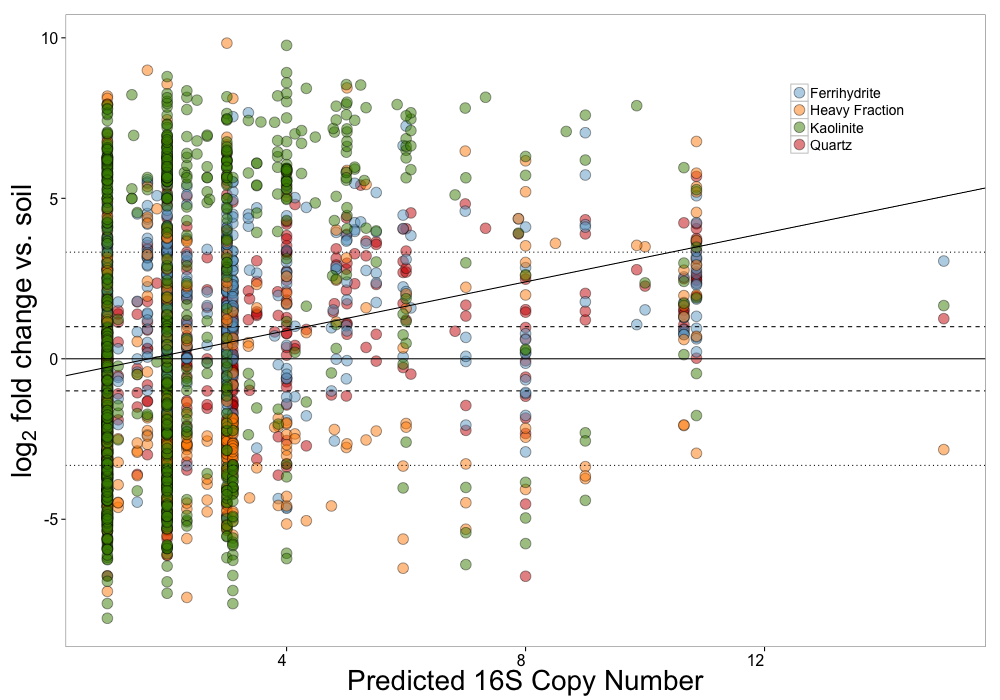

In [80]:
%%R -w 1000 -h 700
# setting the image sizes, then making the figure...

FDR = 0.1
cutoff = 0

d = l2fc
d$Copynum = as.numeric(d$Copynum)

d = group_by(d, Trtmt) %>%
    mutate(sig = ifelse(padj<FDR,1,0))%>%
    filter(pvalue != 'NA')%>%
#    filter(l2FC>cutoff)%>%
    filter(Copynum != "NA")
# This compares it to the whole sample, not just the signficantly increased subset in l2fc
  
#d$Trtmt = ordered(d$Trtmt, levels = c("Ferrihydrite", "Quartz", "Kaolinite", "Heavy Fraction"))
    
p = ggplot(d, aes(x = Copynum, y = l2FC, fill=Trtmt))
# establishing our plot is based on the data table d, with our x being the phylum, and the y being log2fold change,
# and the colour being based on our "yes" or "no" column in the d data table.

#p = p + facet_grid(~Trtmt, scales="free_x")
# saying we want it to present the data separately for our variables (trtmt), in 2 columns
    
p = p + geom_point(shape = 21, alpha=0.5, size=5)
# sets the points size and shape, and offsets them slightly (jitter) so they're not right on top of each other

p = p + scale_size_continuous("log(Relative\nAbundance)",trans="log",guide="none")
    
p = p + geom_hline(y = 1, linetype=2)
p = p + geom_hline(y = -1, linetype=2)
p = p + geom_hline(y = 3.3219, linetype=3)
p = p + geom_hline(y = -3.3219, linetype=3)
p = p + geom_hline(y = 0.0, linetype=1)
# puts in horizontal lines at reference values

#p = p + geom_abline(slope=m, intercept=b)
# puts in general fit line for all data points.. may not want this.

p = p + theme_bw()
# sets a theme

p = p + theme(strip.text.x = element_text(size = 24),
              strip.text.y = element_text(size = 24),
              axis.text.x = element_text(size = 16,hjust = 1, vjust = 1),
              axis.title.x = element_text(size = 28),
              axis.text.y = element_text(size=16),
              axis.title.y = element_text(size = 28),
              legend.title = element_text(size=20),
              legend.text = element_text(size = 14),
              #legend.position = "none",
              strip.background = element_blank())
# sets a bunch of visual paramters for the legend (none) and other text
    
p = p + labs(x = "Predicted 16S Copy Number")
# sets the label for the x axis. I think they didn't get the different colours.

p = p + labs(y = expression(paste("", log[2]," fold change vs. soil",sep="")))
# sets the label for the y axes.

p = p + scale_fill_manual(values=c("skyblue3","darkorange","chartreuse4","red3","black","gold1"))

p = p + guides(fill=guide_legend(title=""))
p = p + theme(legend.position=c(0.85,0.85))

p = p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())
# Gets rid of the default gridlines
   
p

In [56]:
%%R
ggsave(filename="16SCopyNum.AGU.jpg", plot=p ,width=8, height=7)

Could potentially test to see if, as copynum increases, DA is more likely to be positive?

# Statistics

In [84]:
%%R
d = l2fc%>%
    #filter(padj<0.1)
    filter(is.na(Copynum)==FALSE)%>%
    mutate(Copynum=as.numeric(Copynum))

da.lm=lm(data=d,l2FC~Copynum+Trtmt+Phylum)
da.summary = summary.lm(da.lm)
b=da.summary$coefficients[1,1]
m=da.summary$coefficients[2,1]
da.summary


Call:
lm(formula = l2FC ~ Copynum + Trtmt + Phylum, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5609 -1.8866 -0.2611  1.8909 11.9725 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             4.696510   0.935572   5.020 5.47e-07 ***
Copynum                 0.313877   0.037077   8.465  < 2e-16 ***
TrtmtHeavy Fraction    -2.463144   0.160713 -15.326  < 2e-16 ***
TrtmtKaolinite         -0.101970   0.153528  -0.664 0.506627    
TrtmtQuartz            -0.982480   0.152213  -6.455 1.26e-10 ***
PhylumAcidobacteria    -2.360879   1.232893  -1.915 0.055599 .  
PhylumActinobacteria   -4.744018   0.934701  -5.075 4.10e-07 ***
PhylumAD3              -5.602833   1.785987  -3.137 0.001723 ** 
PhylumAquificae        -1.825224   1.421561  -1.284 0.199256    
PhylumArmatimonadetes  -6.292235   1.277842  -4.924 8.93e-07 ***
PhylumBacteroidetes    -2.175390   0.951493  -2.286 0.022306 *  
PhylumChlamydiae       -5.313484   0.955706  -5.

In [82]:
%%R
d = l2fc%>%
    #filter(padj<0.1)
    filter(is.na(Copynum)==FALSE)%>%
    mutate(Copynum=as.numeric(Copynum))
    
da.aov=aov(data=d,l2FC~Copynum+Trtmt+Phylum)
da.summary = summary.aov(da.aov)
da.summary

              Df Sum Sq Mean Sq F value Pr(>F)    
Copynum        1   1996  1996.1  213.72 <2e-16 ***
Trtmt          3   3696  1232.1  131.92 <2e-16 ***
Phylum        32   4029   125.9   13.48 <2e-16 ***
Residuals   3011  28122     9.3                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
